In [1]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [110]:
data = pd.read_csv('./data/low_temp_19_06.csv')
data.head(5)

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed actual liquid flow, m3/h","gas_feed actual vapour flow, m3/h",gas_feed mass heat capacity,gas_feed vapour fraction,"gas_feed molar flow, kgmole/h",...,17 mass heat capacity,17 vapour fraction,"17 molar flow, kgmole/h",17 Methane mass frac,17 Ethane mass frac,17 Propane mass frac,17 i-Butane mass frac,17 n-Butane mass frac,17 i-Pentane mass frac,17 n-Pentane mass frac
0,-16.0,4232.0,18878.0,23.886155,72.430533,15.214508,245.421431,2.559543,0.758989,0.219537,...,2.251392,0.005083,0.048132,5.404426e-02,0.036171,0.217006,0.180343,0.452925,0.024123,0.035387
1,1.0,4833.0,7853.0,23.778683,74.311097,5.086837,100.590515,2.656815,0.818161,0.091737,...,2.475215,0.000000,0.015413,3.027299e-02,0.077611,0.109804,0.516098,0.234971,0.014643,0.016601
2,-22.0,4414.0,7030.0,24.589672,90.075960,6.902782,71.142459,2.669121,0.680374,0.079415,...,3.285931,0.000258,0.014639,4.030112e-07,0.057266,0.234016,0.302420,0.376537,0.019800,0.009960
3,-3.0,4493.0,27213.0,22.271846,61.124750,14.281073,430.923204,2.575105,0.862006,0.339405,...,3.117985,0.000000,0.040468,7.377296e-03,0.017134,0.182255,0.258367,0.422353,0.058061,0.054453
4,-13.0,4845.0,15393.0,23.169794,79.132676,11.413371,183.108043,2.667372,0.785855,0.184543,...,2.299467,0.004158,0.035108,4.744479e-02,0.049843,0.185275,0.329214,0.311684,0.026514,0.050026


In [111]:
# Расчитываем дополнительные параметры
data['gas_feed molar flow, kgmole/h'] = data['gas_feed molar flow, kgmole/h'] * 3600

data['gas_feed vapour molar flow, kgmole/h'] = data['gas_feed vapour fraction'] * data['gas_feed molar flow, kgmole/h']
data['gas_feed liquid molar flow, kgmole/h'] = data['gas_feed molar flow, kgmole/h'] - data['gas_feed vapour molar flow, kgmole/h']

# Определяем плотность сырьевого газа

In [112]:
gas_feed_dens_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Mass density, kg/m3',
]]

In [113]:
gas_feed_dens_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac,"gas_feed Mass density, kg/m3"
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,719.365460,0.478100,0.123451,0.071425,0.143169,0.163620,0.010120,0.010114,74.084199
std,10.275480,404.079523,7214.000778,2.113006,303.963663,0.080897,0.051093,0.030432,0.064367,0.087054,0.004282,0.004284,18.272784
min,-25.000000,3500.000000,5000.000000,17.914715,164.014283,0.263626,0.010702,0.014382,0.020922,0.002471,0.002245,0.002278,32.152684
25%,-17.000000,3861.000000,11270.000000,23.020770,459.266317,0.419969,0.085843,0.046374,0.089984,0.091384,0.006594,0.006586,60.824100
50%,-9.000000,4214.000000,17512.000000,24.479015,714.255561,0.472891,0.126745,0.070364,0.143793,0.167682,0.009869,0.009859,71.535329
75%,0.000000,4560.000000,23749.750000,25.973181,969.084648,0.530332,0.160758,0.093590,0.192866,0.234552,0.013172,0.013167,84.574906
max,10.000000,4900.000000,30000.000000,31.365853,1617.505790,0.841226,0.318581,0.219201,0.379860,0.433455,0.032060,0.033310,202.689706


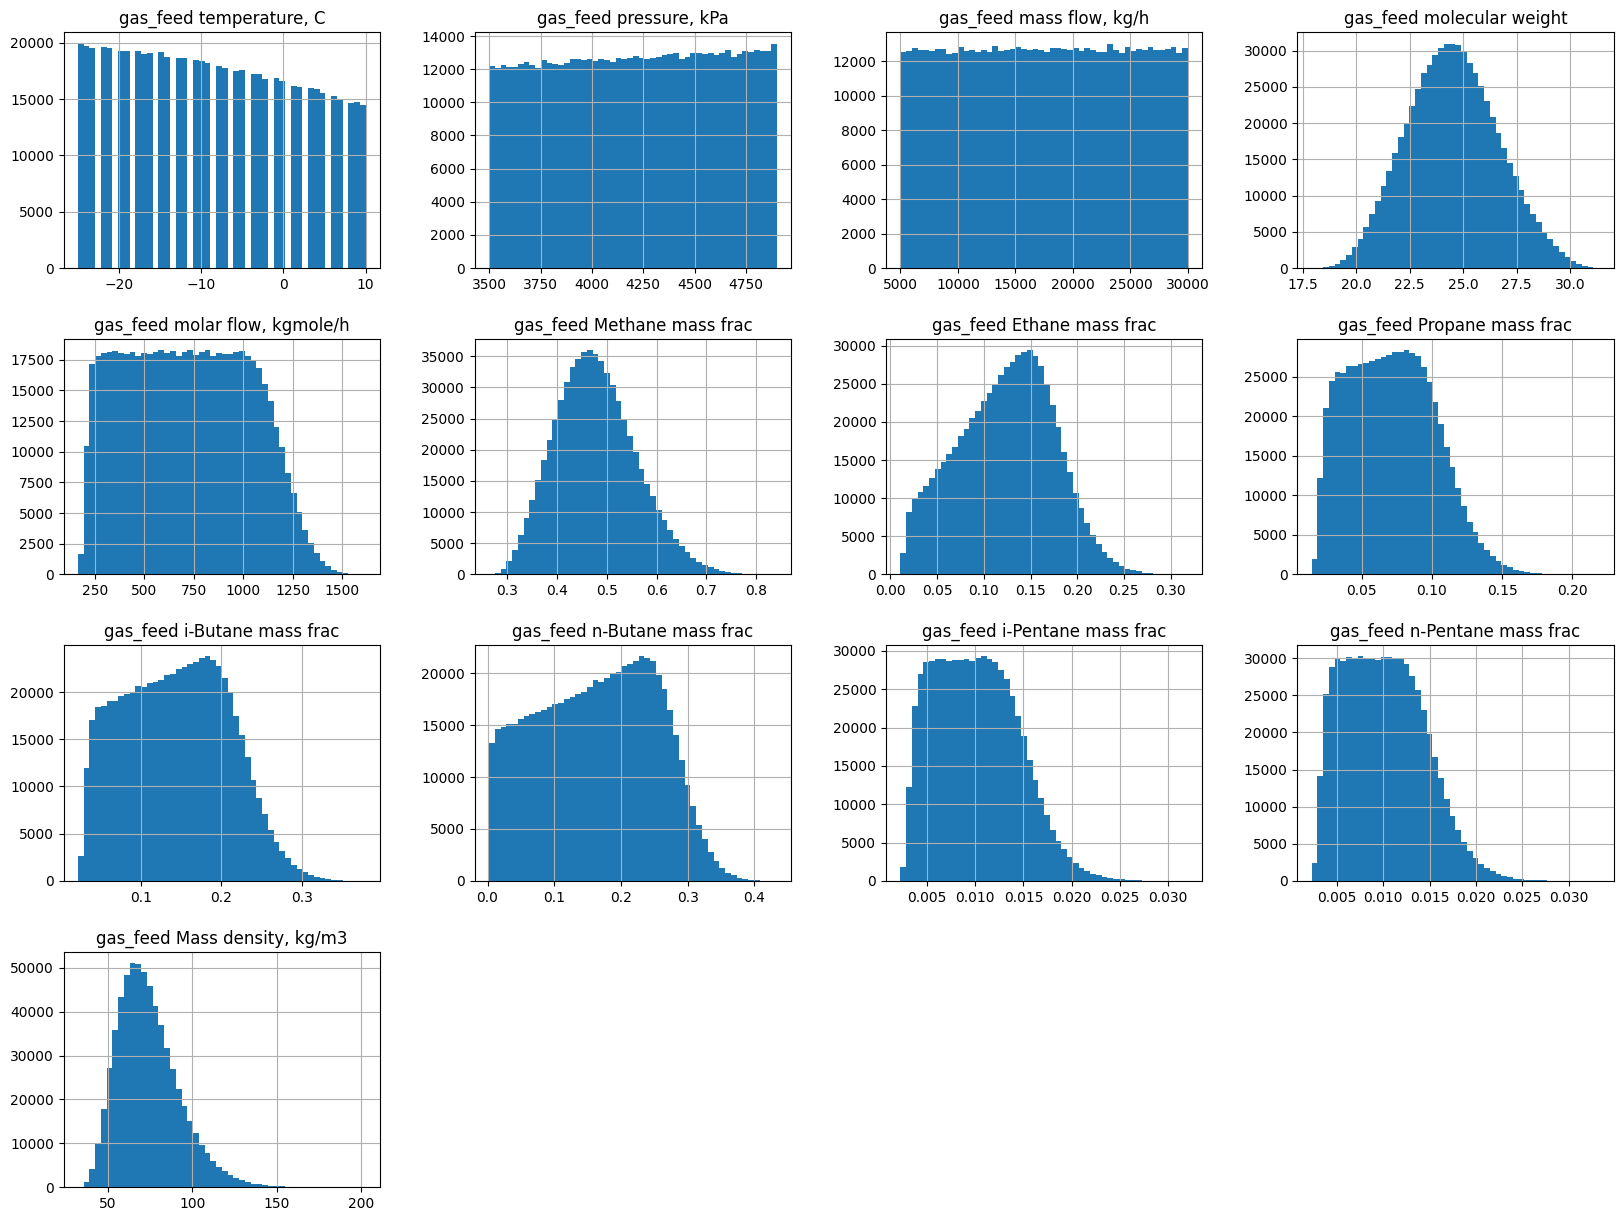

In [114]:
gas_feed_dens_data.hist(bins=50, figsize=(20, 15));

In [115]:
corr_matrix = gas_feed_dens_data.corr()

corr_matrix['gas_feed Mass density, kg/m3'].sort_values(ascending=False)

gas_feed Mass density, kg/m3     1.000000
gas_feed molecular weight        0.739884
gas_feed pressure, kPa           0.507707
gas_feed n-Butane mass frac      0.470699
gas_feed i-Butane mass frac      0.259472
gas_feed Ethane mass frac        0.012255
gas_feed Propane mass frac       0.011486
gas_feed mass flow, kg/h         0.001205
gas_feed n-Pentane mass frac    -0.103936
gas_feed i-Pentane mass frac    -0.104715
gas_feed molar flow, kgmole/h   -0.148174
gas_feed temperature, C         -0.365481
gas_feed Methane mass frac      -0.713992
Name: gas_feed Mass density, kg/m3, dtype: float64

In [116]:
gas_dens_mini_data = gas_feed_dens_data.sample(frac=0.5)

In [117]:
## Тестовая и обучающая выборки
X = gas_dens_mini_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

y = gas_dens_mini_data[[
    'gas_feed Mass density, kg/m3',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((253300, 12), (253300, 1))

In [118]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_0 = gas_feed_dens_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 1.7367 - mae: 1.7367
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2469 - mae: 0.2469
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2081 - mae: 0.2081
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1871 - mae: 0.1871
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1770 - mae: 0.1770
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1657 - mae: 0.1657
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1484 - mae: 0.1484
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1354 - mae: 0.1354
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1307 - mae: 0.1307
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1249 - mae: 0.1249
Epoch 11/20
7916/7916 [======

In [119]:
gas_feed_dens_model_0.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 962us/step - loss: 0.0806 - mae: 0.0806


[0.08064509183168411, 0.08064509183168411]

In [120]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_1 = gas_feed_dens_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 11s 1ms/step - loss: 1.3465 - mae: 1.3465
Epoch 2/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2769 - mae: 0.2769
Epoch 3/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2540 - mae: 0.2540
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.2468 - mae: 0.2468
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2434 - mae: 0.2434
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2264 - mae: 0.2264
Epoch 7/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.2225 - mae: 0.2225
Epoch 8/20
7916/7916 [==============================] - 13s 2ms/step - loss: 0.2187 - mae: 0.2187
Epoch 9/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.2137 - mae: 0.2137
Epoch 10/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.2074 - mae: 0.2074
Epoch 11/20
7916/79

In [121]:
gas_feed_dens_model_1.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 944us/step - loss: 0.0702 - mae: 0.0702


[0.07019557803869247, 0.07019557803869247]

In [122]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_2 = gas_feed_dens_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 1.0436 - mae: 1.0436
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.5855 - mae: 0.5855
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.5125 - mae: 0.5125
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.4530 - mae: 0.4530
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.4146 - mae: 0.4146
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3992 - mae: 0.3992
Epoch 7/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.3689 - mae: 0.3689
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.3631 - mae: 0.3631
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3261 - mae: 0.3261
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3272 - mae: 0.3272
Epoch 11/20
7916/7916 [==

In [123]:
gas_feed_dens_model_2.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 896us/step - loss: 0.1224 - mae: 0.1224


[0.1224314272403717, 0.1224314272403717]

In [124]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_3 = gas_feed_dens_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 10.7852 - mae: 10.7852
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 1.4334 - mae: 1.4334
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.6514 - mae: 0.6514
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.4315 - mae: 0.4315
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.3305 - mae: 0.3305
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2617 - mae: 0.2617
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2176 - mae: 0.2176
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1939 - mae: 0.1939
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1801 - mae: 0.1801
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1690 - mae: 0.1690
Epoch 11/20
7916/7916 [

In [125]:
gas_feed_dens_model_3.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 909us/step - loss: 0.1187 - mae: 0.1187


[0.11871270090341568, 0.11871270090341568]

In [126]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_4 = gas_feed_dens_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 2.1909 - mae: 2.1909
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3092 - mae: 0.3092
Epoch 3/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2542 - mae: 0.2542
Epoch 4/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2329 - mae: 0.2329
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2236 - mae: 0.2236
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2169 - mae: 0.2169
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2163 - mae: 0.2163
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2152 - mae: 0.2152
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2134 - mae: 0.2134
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2100 - mae: 0.2100
Epoch 11/20
7916/7916 [=

In [127]:
gas_feed_dens_model_4.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 863us/step - loss: 0.1812 - mae: 0.1812


[0.18116572499275208, 0.18116572499275208]

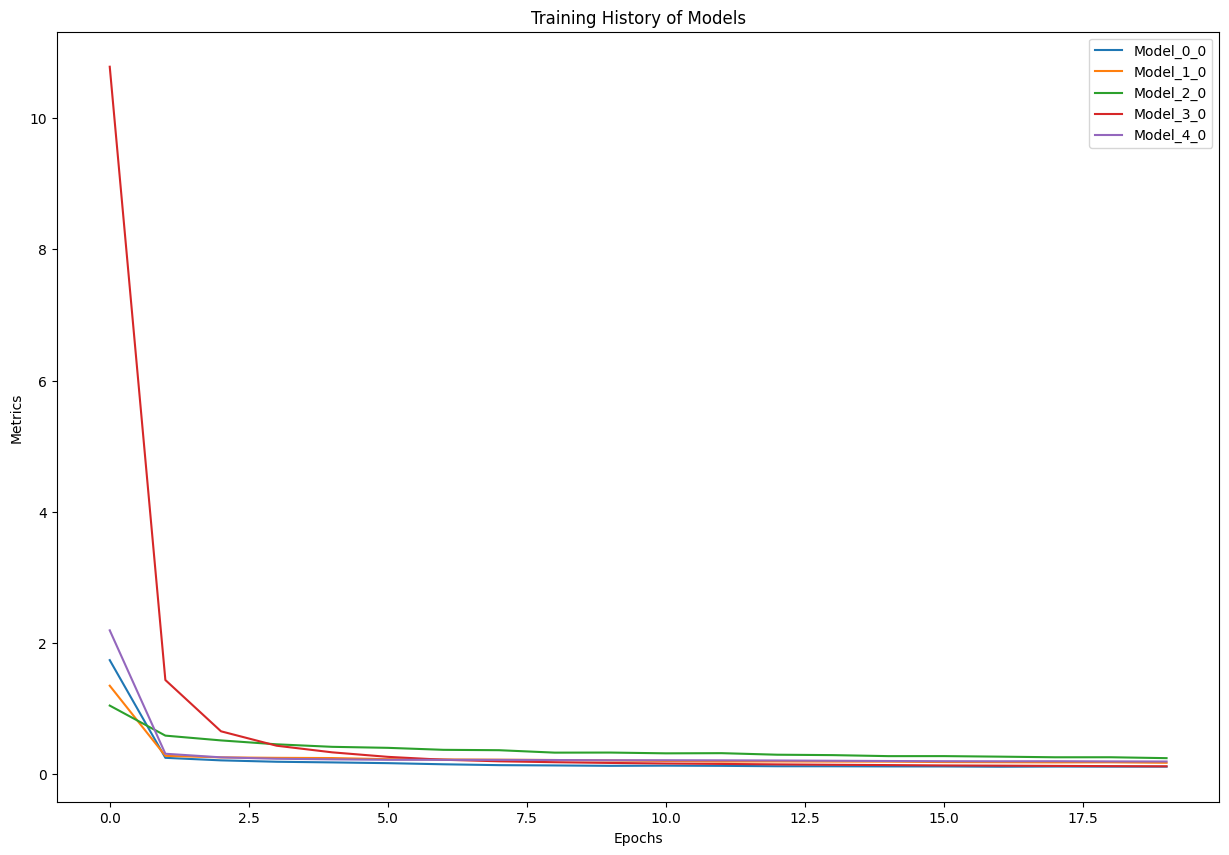

In [128]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(gas_feed_dens_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(gas_feed_dens_history_1.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(gas_feed_dens_history_2.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(gas_feed_dens_history_3.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(gas_feed_dens_history_4.history['loss']).add_prefix('Model_4_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

## Основная модель для определения плотности сырьевого потока

In [129]:
## Тестовая и обучающая выборки
X = gas_feed_dens_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

y = gas_feed_dens_data[[
    'gas_feed Mass density, kg/m3',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((506600, 12), (506600, 1))

In [130]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history = gas_feed_dens_model.fit(X_train_normal, y_train, epochs=30)

Epoch 1/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.9799 - mae: 0.9799
Epoch 2/30
15832/15832 [==============================] - 21s 1ms/step - loss: 0.2072 - mae: 0.2072
Epoch 3/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.1943 - mae: 0.1943
Epoch 4/30
15832/15832 [==============================] - 21s 1ms/step - loss: 0.1725 - mae: 0.1725
Epoch 5/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.1475 - mae: 0.1475
Epoch 6/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.1363 - mae: 0.1363
Epoch 7/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.1299 - mae: 0.1299
Epoch 8/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.1268 - mae: 0.1268
Epoch 9/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.1217 - mae: 0.1217
Epoch 10/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.1198 - mae: 0.1198

In [131]:
gas_feed_dens_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 4s 874us/step - loss: 0.0652 - mae: 0.0652


[0.06520134955644608, 0.06520134955644608]

In [132]:
y_pred = gas_feed_dens_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 743us/step


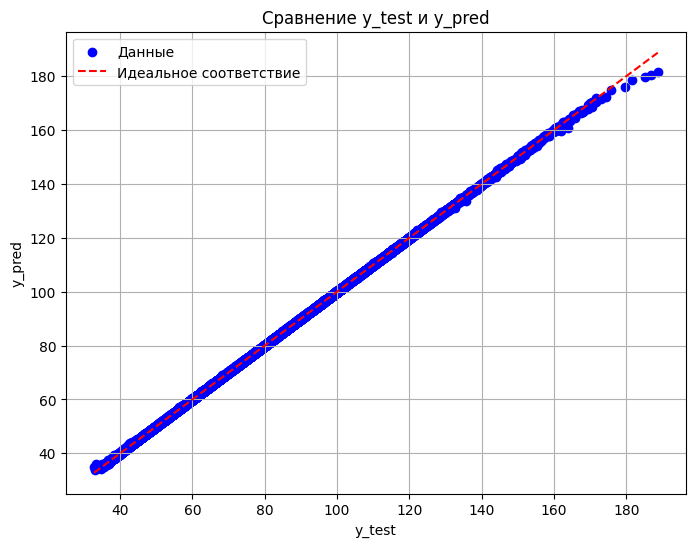

In [133]:
# Диаграмма разброса с линией идеального соответствия

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Данные')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Идеальное соответствие')
plt.title('Сравнение y_test и y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [135]:
X_test

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac
340638,-10.0,3540.0,16899.0,26.585286,635.652378,0.394813,0.150543,0.047168,0.106947,0.276140,0.011994,0.012395
314613,-21.0,3790.0,24089.0,23.603790,1020.556431,0.483130,0.198344,0.045978,0.185918,0.063712,0.005943,0.016975
219439,5.0,4817.0,18631.0,26.997583,690.098817,0.375571,0.175129,0.023803,0.032971,0.376260,0.007249,0.009018
374434,-6.0,4064.0,14592.0,26.462820,551.415162,0.436700,0.022114,0.111973,0.142956,0.259062,0.013591,0.013606
313146,-7.0,4728.0,10758.0,24.838100,433.124916,0.442039,0.185710,0.039654,0.283748,0.021875,0.006065,0.020908
...,...,...,...,...,...,...,...,...,...,...,...,...
239029,-9.0,3620.0,10158.0,27.353418,371.361269,0.376289,0.129417,0.070583,0.135993,0.260531,0.014595,0.012593
417657,10.0,4873.0,25420.0,21.950612,1158.054292,0.554916,0.202507,0.022506,0.090826,0.110154,0.007720,0.011371
162767,-9.0,3681.0,20358.0,24.790149,821.213306,0.458476,0.126134,0.081317,0.186522,0.139816,0.003728,0.004006
343861,3.0,4545.0,12090.0,22.807115,530.097739,0.519934,0.195279,0.022154,0.051258,0.188030,0.011978,0.011366


In [148]:
X_test.iloc[3]

gas_feed temperature, C             -6.000000
gas_feed pressure, kPa            4064.000000
gas_feed mass flow, kg/h         14592.000000
gas_feed molecular weight           26.462820
gas_feed molar flow, kgmole/h      551.415162
gas_feed Methane mass frac           0.436700
gas_feed Ethane mass frac            0.022114
gas_feed Propane mass frac           0.111973
gas_feed i-Butane mass frac          0.142956
gas_feed n-Butane mass frac          0.259062
gas_feed i-Pentane mass frac         0.013591
gas_feed n-Pentane mass frac         0.013606
Name: 374434, dtype: float64

In [149]:
y_test

,"gas_feed Mass density, kg/m3"
340638,69.584825
314613,66.185900
219439,94.822776
374434,77.162589
313146,86.363934
...,...
239029,75.632742
417657,60.264275
162767,62.468973
343861,62.678720


In [157]:
test_data = pd.DataFrame({
    'gas_feed temperature, C': [3],
    'gas_feed pressure, kPa': [3500],
    'gas_feed mass flow, kg/h': [25000], 
    'gas_feed molecular weight': [30.53],
    'gas_feed molar flow, kgmole/h': [819.0],
    'gas_feed Methane mass frac': [0.2792],
    'gas_feed Ethane mass frac': [0.1236],
    'gas_feed Propane mass frac': [0.1820],
    'gas_feed i-Butane mass frac': [0.2253],
    'gas_feed n-Butane mass frac': [0.1820],
    'gas_feed i-Pentane mass frac': [0.0056],
    'gas_feed n-Pentane mass frac': [0.0023]
}, index=[0])

# test_arr = np.array(test_data)

# min_val = np.min(test_arr)
# max_val = np.max(test_arr)

# test_norm = (test_arr - min_val) / (max_val - min_val)
# test_norm

In [158]:
test_data_norm = ct.transform(test_data)
test_data_norm

array([[8.00000000e-01, 0.00000000e+00, 8.00000000e-01, 9.37860076e-01,
        4.50153197e-01, 2.43160974e-02, 3.66695278e-01, 8.18371963e-01,
        5.69352586e-01, 4.22396581e-01, 1.12530183e-01, 7.00748505e-04]])

In [159]:
dens = gas_feed_dens_model.predict(test_data_norm)
dens[0][0]

1/1 [==============================] - 0s 19ms/step


88.66691

In [156]:
gas_feed_dens_model.save('./models/low_temp_dist_19_06/gas_feed_dens_model.h5')

# Определяем мольную долю пара в сырьевом потоке

In [164]:
gas_feed_vap_fr_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour fraction',
]]

In [165]:
gas_feed_vap_fr_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac,gas_feed vapour fraction
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,74.084199,719.365460,0.478100,0.123451,0.071425,0.143169,0.163620,0.010120,0.010114,0.763452
std,10.275480,404.079523,7214.000778,2.113006,18.272784,303.963663,0.080897,0.051093,0.030432,0.064367,0.087054,0.004282,0.004284,0.104859
min,-25.000000,3500.000000,5000.000000,17.914715,32.152684,164.014283,0.263626,0.010702,0.014382,0.020922,0.002471,0.002245,0.002278,0.312539
25%,-17.000000,3861.000000,11270.000000,23.020770,60.824100,459.266317,0.419969,0.085843,0.046374,0.089984,0.091384,0.006594,0.006586,0.692753
50%,-9.000000,4214.000000,17512.000000,24.479015,71.535329,714.255561,0.472891,0.126745,0.070364,0.143793,0.167682,0.009869,0.009859,0.766630
75%,0.000000,4560.000000,23749.750000,25.973181,84.574906,969.084648,0.530332,0.160758,0.093590,0.192866,0.234552,0.013172,0.013167,0.838392
max,10.000000,4900.000000,30000.000000,31.365853,202.689706,1617.505790,0.841226,0.318581,0.219201,0.379860,0.433455,0.032060,0.033310,1.000000


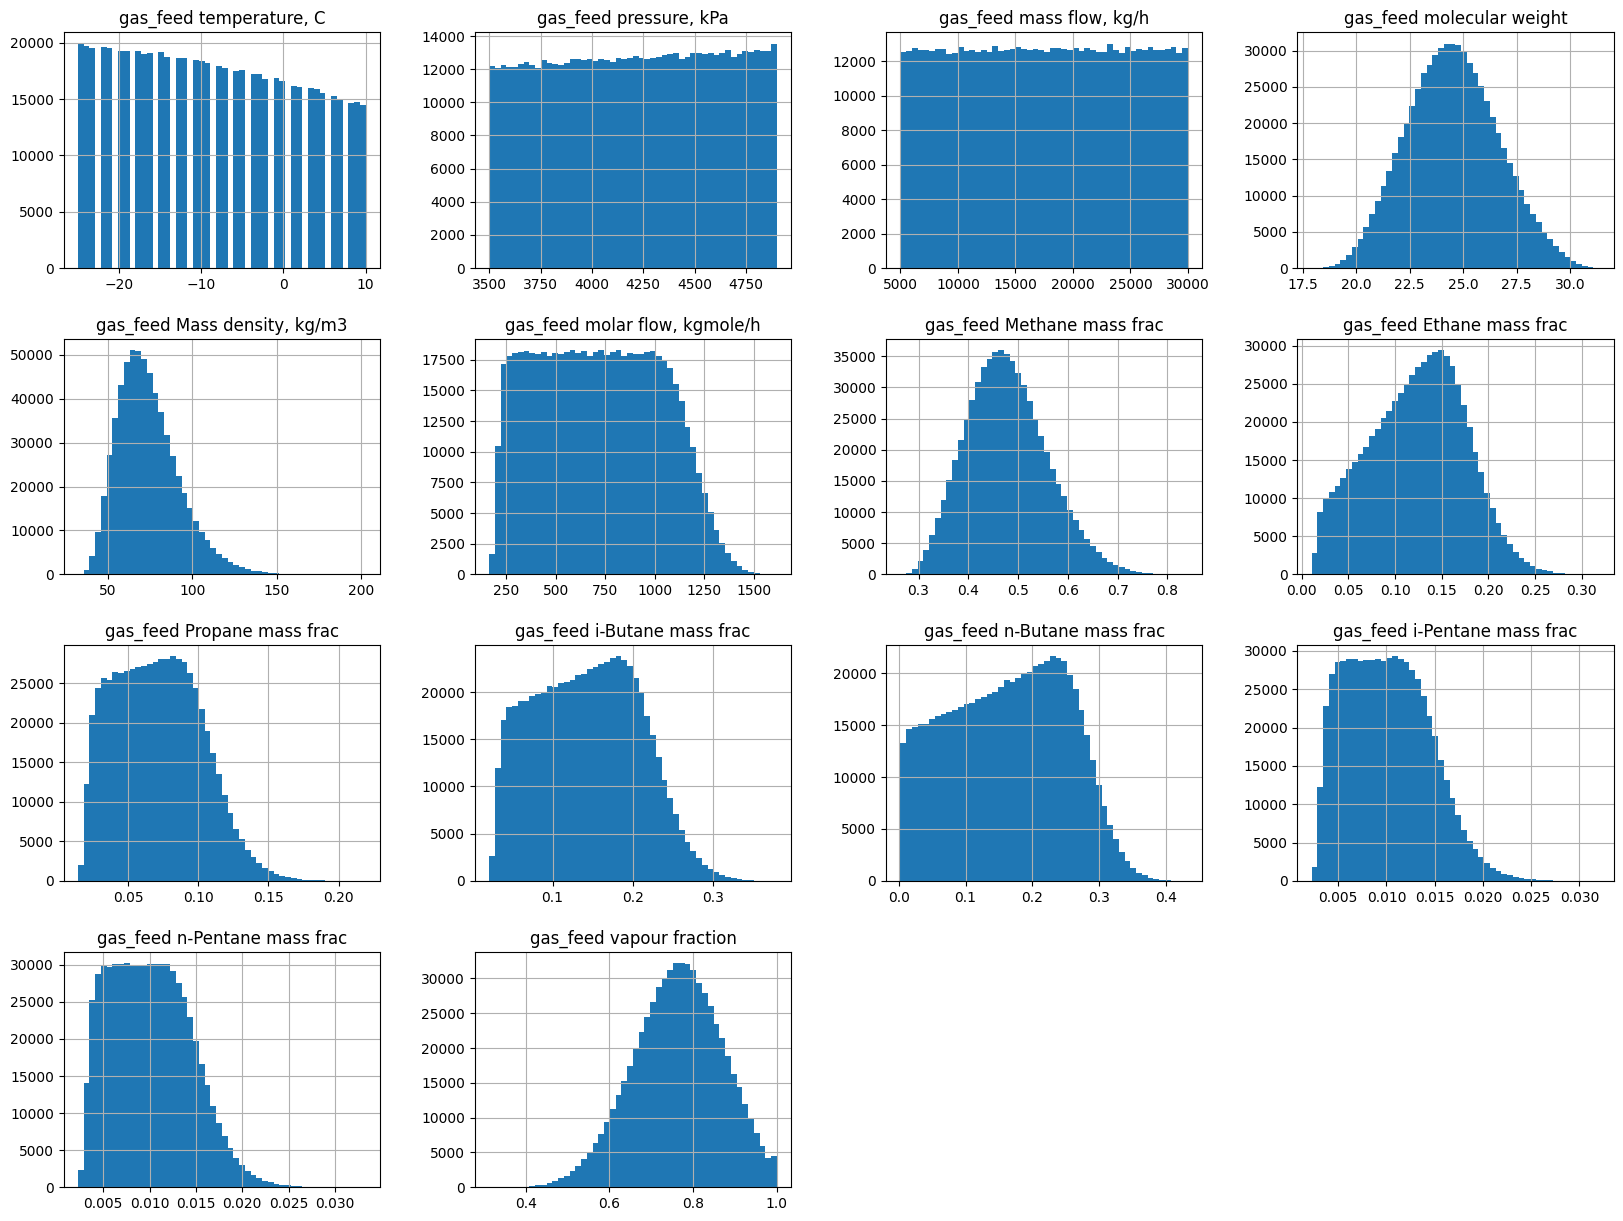

In [166]:
gas_feed_vap_fr_data.hist(bins=50, figsize=(20, 15));

In [167]:
corr_matrix = gas_feed_vap_fr_data.corr()

corr_matrix['gas_feed vapour fraction'].sort_values(ascending=False)

gas_feed vapour fraction         1.000000
gas_feed Methane mass frac       0.859235
gas_feed temperature, C          0.387047
gas_feed molar flow, kgmole/h    0.182043
gas_feed i-Pentane mass frac     0.133693
gas_feed n-Pentane mass frac     0.132885
gas_feed Ethane mass frac        0.054279
gas_feed Propane mass frac       0.001568
gas_feed mass flow, kg/h        -0.001075
gas_feed pressure, kPa          -0.138282
gas_feed i-Butane mass frac     -0.314929
gas_feed n-Butane mass frac     -0.611127
gas_feed molecular weight       -0.895929
gas_feed Mass density, kg/m3    -0.906108
Name: gas_feed vapour fraction, dtype: float64

In [168]:
gas_feed_vap_fr_data_mini = gas_feed_vap_fr_data.sample(frac=0.5)
gas_feed_vap_fr_data_mini.head(10)

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac,gas_feed vapour fraction
97772,-25.0,4877.0,19790.0,27.608500,129.541898,716.808231,0.400914,0.023946,0.114729,0.162296,0.271600,0.008183,0.018332,0.545081
335396,-11.0,4656.0,10928.0,27.313615,106.911995,400.093499,0.386961,0.092360,0.091589,0.211416,0.205890,0.005442,0.006342,0.606342
206047,5.0,4340.0,24605.0,20.484380,47.817862,1201.159154,0.660732,0.082182,0.104158,0.088110,0.036788,0.012536,0.015494,0.976173
578105,-19.0,3632.0,25091.0,22.629031,57.097796,1108.796922,0.510100,0.204057,0.131988,0.048881,0.095639,0.005153,0.004181,0.826694
428809,3.0,4090.0,20179.0,22.622712,53.763884,891.979690,0.556794,0.097916,0.063083,0.111488,0.157180,0.006664,0.006876,0.885490
598775,-4.0,4866.0,12043.0,21.933504,66.230330,549.068688,0.602546,0.065744,0.034270,0.117326,0.166088,0.008329,0.005698,0.867378
162082,-25.0,4318.0,27854.0,21.769045,66.787881,1279.523288,0.606449,0.078282,0.044022,0.116969,0.114437,0.022909,0.016932,0.827586
48708,-1.0,4554.0,26340.0,23.501983,67.966877,1120.756482,0.526841,0.066319,0.113243,0.246774,0.012536,0.017991,0.016296,0.830423
273869,-24.0,4480.0,21189.0,24.589754,92.728246,861.700366,0.463364,0.136169,0.079205,0.047552,0.253610,0.008367,0.011732,0.676599
594649,-6.0,3611.0,9210.0,22.319005,48.404993,412.652806,0.532930,0.193313,0.095198,0.066278,0.090207,0.017554,0.004521,0.900906


In [169]:
## Тестовая и обучающая выборки
X = gas_feed_vap_fr_data_mini[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

y = gas_feed_vap_fr_data_mini[[
    'gas_feed vapour fraction',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((253300, 13), (253300, 1))

In [174]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_vap_fr_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_vap_fr_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_vap_fr_history_0 = gas_feed_vap_fr_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0083 - mae: 0.0083
Epoch 2/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.0021 - mae: 0.0021
Epoch 3/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.0019 - mae: 0.0019
Epoch 4/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.0018 - mae: 0.0018
Epoch 5/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0015 - mae: 0.0015
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0013 - mae: 0.0013
Epoch 11/20
7916/7916 [=====

In [175]:
gas_feed_vap_fr_model_0.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 938us/step - loss: 9.6222e-04 - mae: 9.6222e-04


[0.0009622150682844222, 0.0009622150682844222]

In [176]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_vap_fr_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_vap_fr_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_vap_fr_history_1 = gas_feed_vap_fr_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 12s 1ms/step - loss: 0.0081 - mae: 0.0081
Epoch 2/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0024 - mae: 0.0024
Epoch 3/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0021 - mae: 0.0021
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.0019 - mae: 0.0019
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0018 - mae: 0.0018
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 7/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0015 - mae: 0.0015
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 11/20
7916/79

In [177]:
gas_feed_vap_fr_model_1.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 1ms/step - loss: 6.9641e-04 - mae: 6.9641e-04


[0.0006964107742533088, 0.0006964107742533088]

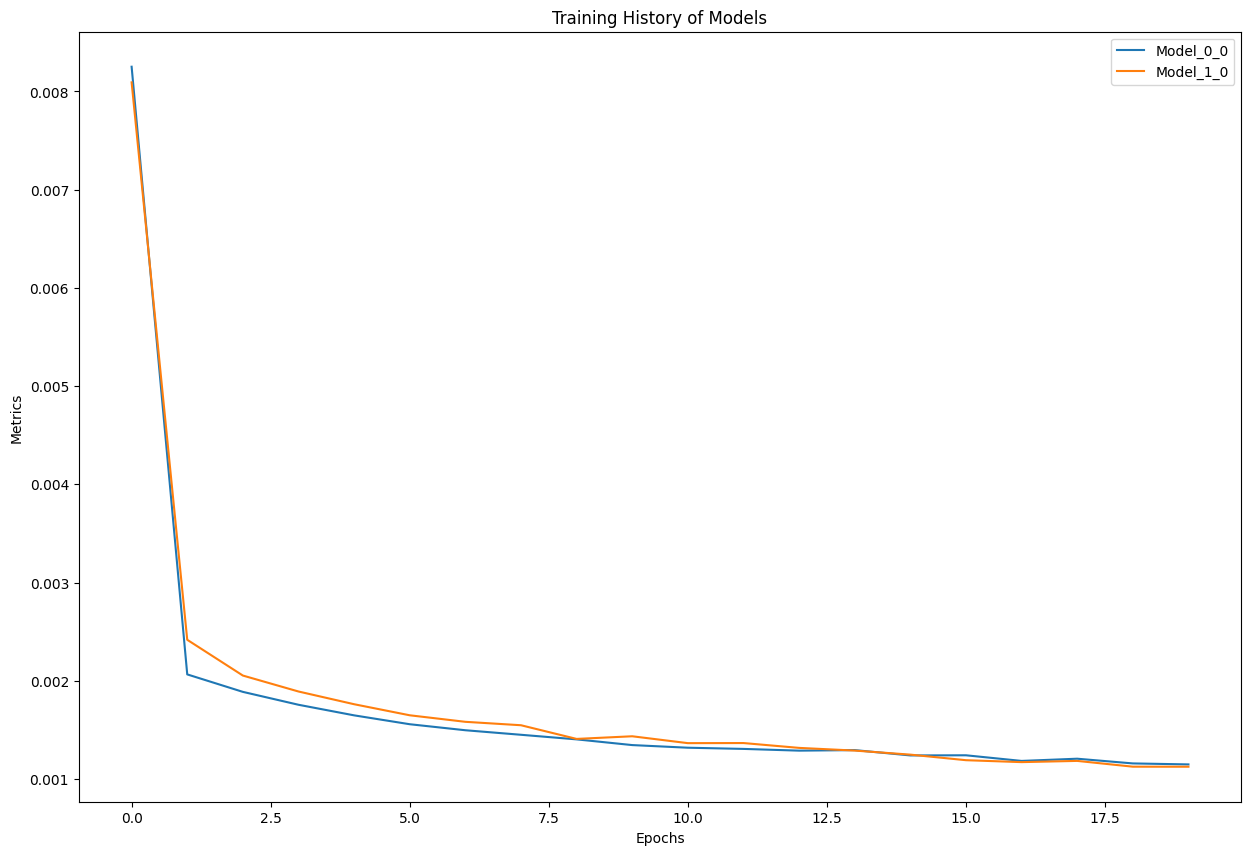

In [178]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(gas_feed_vap_fr_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(gas_feed_vap_fr_history_1.history['loss']).add_prefix('Model_1_')


# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

## Основная модель для определения доли пара

In [179]:
## Тестовая и обучающая выборки
X = gas_feed_vap_fr_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

y = gas_feed_vap_fr_data[[
    'gas_feed vapour fraction',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((506600, 13), (506600, 1))

In [180]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_vap_fr_model = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_vap_fr_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_vap_fr_history = gas_feed_vap_fr_model.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0048 - mae: 0.0048
Epoch 2/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0019 - mae: 0.0019
Epoch 3/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 4/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0015 - mae: 0.0015
Epoch 5/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 6/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0013 - mae: 0.0013
Epoch 7/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0012 - mae: 0.0012
Epoch 8/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0012 - mae: 0.0012
Epoch 9/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0012 - mae: 0.0012
Epoch 10/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0011 - mae: 0.0011

In [181]:
gas_feed_vap_fr_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 4s 907us/step - loss: 6.1636e-04 - mae: 6.1636e-04


[0.0006163616781122983, 0.0006163616781122983]

In [183]:
y_pred = gas_feed_vap_fr_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 751us/step


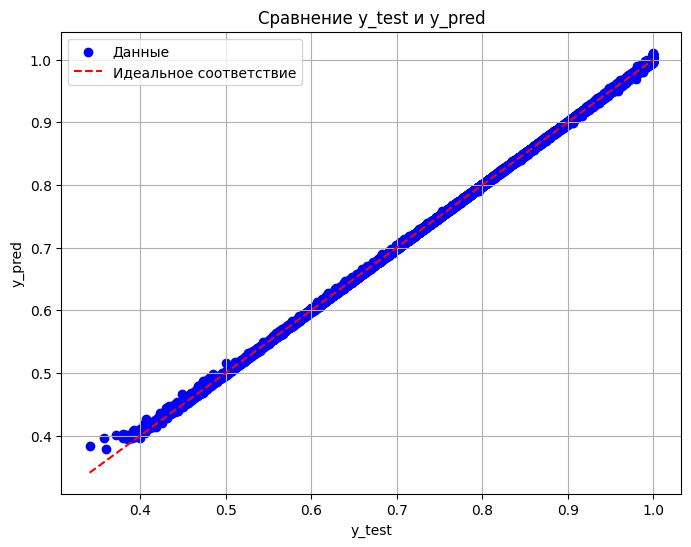

In [184]:
# Диаграмма разброса с линией идеального соответствия

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Данные')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Идеальное соответствие')
plt.title('Сравнение y_test и y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [211]:
test_data = pd.DataFrame({
    'gas_feed temperature, C': [-10],
    'gas_feed pressure, kPa': [4000],
    'gas_feed mass flow, kg/h': [25000], 
    'gas_feed molecular weight': [30.53],
    'gas_feed Mass density, kg/m3': [88.37],
    'gas_feed molar flow, kgmole/h': [819.0],
    'gas_feed Methane mass frac': [0.2792],
    'gas_feed Ethane mass frac': [0.1236],
    'gas_feed Propane mass frac': [0.1820],
    'gas_feed i-Butane mass frac': [0.2253],
    'gas_feed n-Butane mass frac': [0.1820],
    'gas_feed i-Pentane mass frac': [0.0056],
    'gas_feed n-Pentane mass frac': [0.0023]
}, index=[0])

In [212]:
test_data_norm = ct.transform(test_data)
test_data_norm

array([[4.28571429e-01, 3.57142857e-01, 8.00000000e-01, 9.37860076e-01,
        3.29648750e-01, 4.50153197e-01, 2.43160974e-02, 3.66695278e-01,
        8.18371963e-01, 5.69352586e-01, 4.22396581e-01, 1.12530183e-01,
        7.00748505e-04]])

In [213]:
vap_fr = gas_feed_vap_fr_model.predict(test_data_norm)
vap_fr[0][0]

1/1 [==============================] - 0s 20ms/step


0.5429796